<a href="https://colab.research.google.com/github/Praneeth-18/DataMining6/blob/main/Clustering_with_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering images using embeddings from a Large Language Model (LLM) like CLIP (Contrastive Language–Image Pretraining) can be an effective way to group images based on their content and context. CLIP, developed by OpenAI, is designed to understand images in the context of natural language, making it a powerful tool for generating meaningful image embeddings.

Let's go through the steps to cluster images using CLIP embeddings. We'll use a synthetic set of images for this example.

In [1]:
!pip install transformers
!pip install umap-learn
!pip install scikit-learn
!pip install pillow  # For image processing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.1 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=6d2d35e908c036cbbaf2758528a8297cc36157d1306e55476bee490b7ca1ae88
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [2]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
import torch
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [10]:
import os

# Directory containing images
image_dir = '/content/drive/MyDrive/Datasets for CMPE 255/Urban100_LR_x4'

images = []
for filename in os.listdir(image_dir):
    if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
        try:
            img_path = os.path.join(image_dir, filename)
            img = Image.open(img_path)
            images.append(img)
        except IOError as e:
            print(f"Could not read image {filename}: {e}")

In [12]:
def get_clip_embeddings(images):
    inputs = processor(images=images, return_tensors="pt")
    with torch.no_grad():
        outputs = model.get_image_features(**inputs)
    return outputs

embeddings = get_clip_embeddings(images).numpy()

In [13]:
reducer = umap.UMAP(n_neighbors=5, n_components=2, metric='cosine')
embeddings_reduced = reducer.fit_transform(embeddings)

In [15]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(embeddings_reduced)

In [16]:
# Simple visualization: Print the images' URLs grouped by cluster
for i in range(max(clusters) + 1):
    print(f"\nCluster {i}:")
    for j, url in enumerate(image_urls):
        if clusters[j] == i:
            print(url)


Cluster 0:
https://link-to-second-image.jpg

Cluster 1:
https://link-to-first-image.jpg

Cluster 2:


In [17]:
!pip install matplotlib

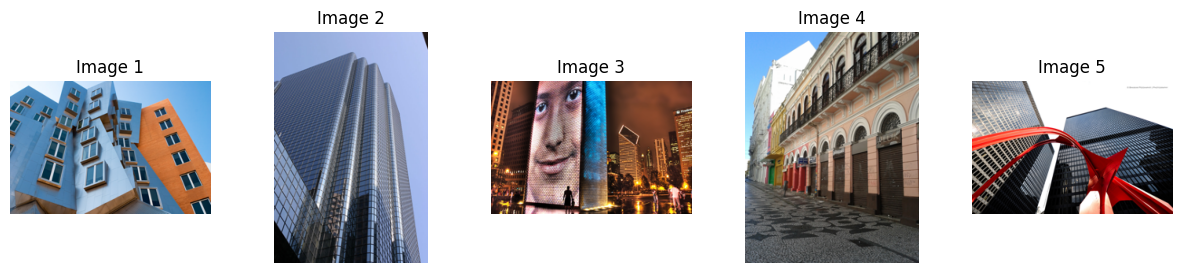

In [19]:
import matplotlib.pyplot as plt

# Assuming 'images' is your list of PIL image objects
num_images_to_display = 5

plt.figure(figsize=(15, 3))
for i, img in enumerate(images[:num_images_to_display]):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Image {i+1}')
plt.show()

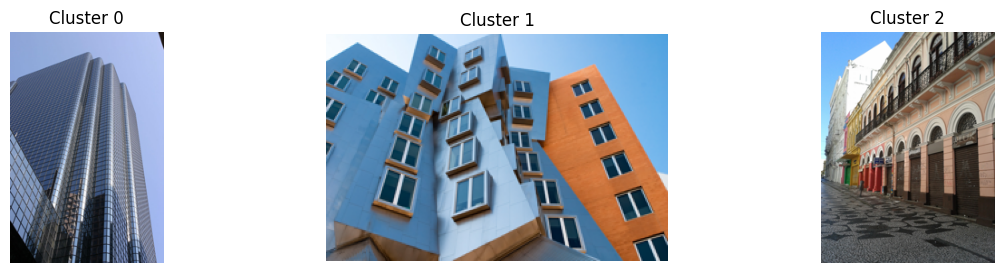

In [20]:
import matplotlib.pyplot as plt

# Define the number of clusters to display
num_clusters_to_display = min(5, len(set(clusters)))  # Display up to 5 clusters

plt.figure(figsize=(15, 3))
for cluster_num in range(num_clusters_to_display):
    # Find the first image in each cluster
    for img, cluster in zip(images, clusters):
        if cluster == cluster_num:
            plt.subplot(1, num_clusters_to_display, cluster_num + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f'Cluster {cluster_num}')
            break  # Move to the next cluster after displaying the first image

plt.show()